In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Inserciones

In [300]:
df_id = pd.read_csv("inserciones_id.csv")
df_usr = pd.read_csv("inserciones_username.csv")
df_dv_id = pd.read_csv("dv_inserciones_id.csv")
df_dv_usr = pd.read_csv("dv_inserciones_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.619556  1.148362  1.707983  2.187022   
1      hashing_cerrado_lineal  0.476270  0.893449  1.350693  1.688155   
2  hashing_cerrado_cuadratico  0.472679  0.876039  1.305150  1.676202   
3       hashing_cerrado_doble  0.478160  0.884380  1.384945  1.741511   
4          std::unordered_map  0.428913  0.832072  1.299694  1.631080   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  2.730099  3.217746  3.696208  4.337439  4.909918  ...  6.061672  6.628943   
1  2.125263  2.573193  2.901222  3.380499  3.814446  ...  4.675326  5.118413   
2  2.119758  2.571394  2.913538  3.384547  3.794224  ...  4.663822  5.134271   
3  2.215671  2.664577  3.016461  3.546619  3.937425  ...  4.822749  5.325472   
4  1.991116  2.571102  2.874857  3.272888  3.634561  ...  4.895264  5.262709   

      13000     14000     15000     16000     17000      18000      19000  \
0  

In [301]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="inserciones", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="inserciones", value_name="tiempo")

df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_inserciones", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_inserciones", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())


df_id_melted['inserciones'] = df_id_melted['inserciones'].astype(int)
df_usr_melted['inserciones'] = df_usr_melted['inserciones'].astype(int)

                         mapa inserciones    tiempo  tiempo_err
0             hashing_abierto        1000  0.619556    0.069899
1      hashing_cerrado_lineal        1000  0.476270    0.053744
2  hashing_cerrado_cuadratico        1000  0.472679    0.058363
3       hashing_cerrado_doble        1000  0.478160    0.059594
4          std::unordered_map        1000  0.428913    0.045852
                         mapa inserciones    tiempo  tiempo_err
0             hashing_abierto        1000  0.782441    0.033503
1      hashing_cerrado_lineal        1000  0.652567    0.026355
2  hashing_cerrado_cuadratico        1000  0.634073    0.053405
3       hashing_cerrado_doble        1000  0.826626    0.051780
4          std::unordered_map        1000  0.407588    0.026379


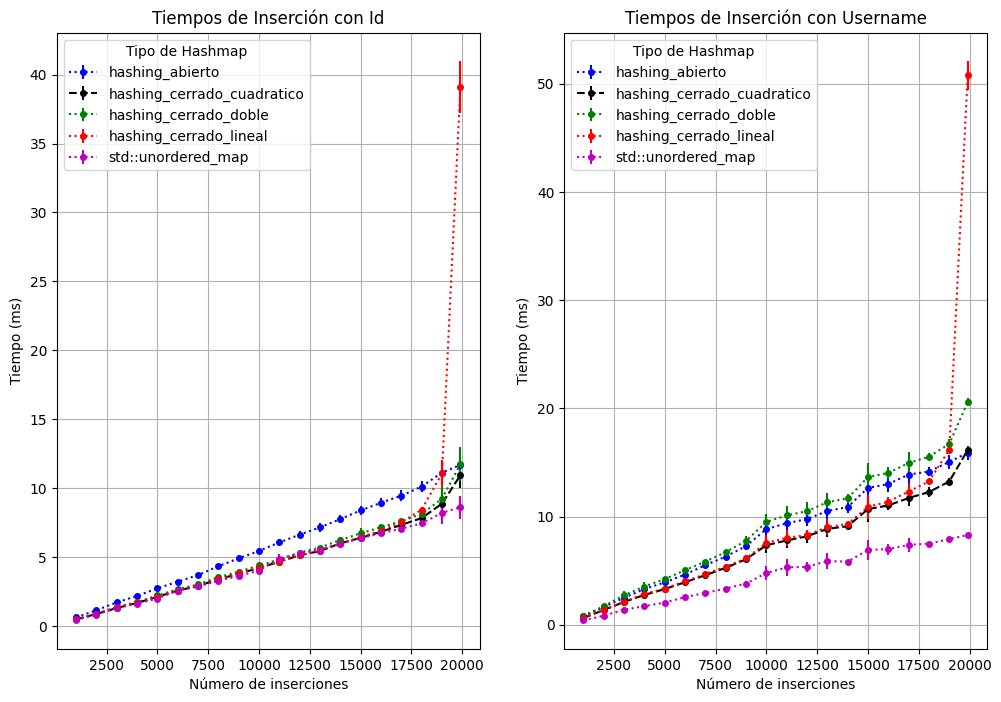

In [302]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de inserciones")

axes[0].set(title="Tiempos de Inserción con Id")
axes[1].set(title="Tiempos de Inserción con Username")

plt.savefig("inserciones.png", bbox_inches="tight")
plt.show()


# Busquedas Tipo 1

In [303]:
df_id = pd.read_csv("busquedas1_id.csv")
df_usr = pd.read_csv("busquedas1_username.csv")
df_dv_id = pd.read_csv("dv_busquedas1_id.csv")
df_dv_usr = pd.read_csv("dv_busquedas1_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa  0.300000  0.350000  0.400000  0.450000  \
0             hashing_abierto  0.672117  0.715045  0.780691  0.873566   
1      hashing_cerrado_lineal  0.644821  0.680025  0.734023  0.823222   
2  hashing_cerrado_cuadratico  0.637742  0.681066  0.738524  0.801504   
3       hashing_cerrado_doble  0.680720  0.740616  0.831863  0.911597   
4          std::unordered_map  0.601264  0.644812  0.702711  0.773988   

   0.500000  0.550000  0.600000  0.650000  0.700000  0.750000  0.800000  \
0  0.911554  1.004831  1.086460  1.118222  1.319949  1.333642  1.404514   
1  0.876449  0.950066  1.017230  1.090847  1.246395  1.297887  1.418523   
2  0.862695  0.933993  1.001580  1.026275  1.157301  1.250925  1.264049   
3  0.922606  1.024707  1.128201  1.142852  1.289509  1.346980  1.439389   
4  0.819178  0.721787  0.790800  0.801147  0.916381  0.933962  0.957849   

   0.850000  0.900000  0.950000  
0  1.533295  1.595605  1.696077  
1  1.592653  1.915895  2.628015  
2  1.379

In [304]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="factor", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="factor", value_name="tiempo")
df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]



df_id_melted["factor"] = df_id_melted["factor"].astype(float)
df_usr_melted["factor"] = df_usr_melted["factor"].astype(float)

#df_id_melted = df_id_melted.drop(df_id_melted[df_id_melted["busquedas"] > 15000].index)
#df_usr_melted = df_usr_melted.drop(df_usr_melted[df_usr_melted["busquedas"] > 15000].index)

print(df_id_melted.head())
print(df_usr_melted.head())


                         mapa  factor    tiempo  tiempo_err
0             hashing_abierto     0.3  0.672117    0.080392
1      hashing_cerrado_lineal     0.3  0.644821    0.049533
2  hashing_cerrado_cuadratico     0.3  0.637742    0.059826
3       hashing_cerrado_doble     0.3  0.680720    0.052894
4          std::unordered_map     0.3  0.601264    0.055021
                         mapa  factor    tiempo  tiempo_err
0             hashing_abierto     0.3  1.659968    0.171813
1      hashing_cerrado_lineal     0.3  1.624707    0.084548
2  hashing_cerrado_cuadratico     0.3  1.628291    0.087276
3       hashing_cerrado_doble     0.3  2.559681    0.118047
4          std::unordered_map     0.3  0.726716    0.125408


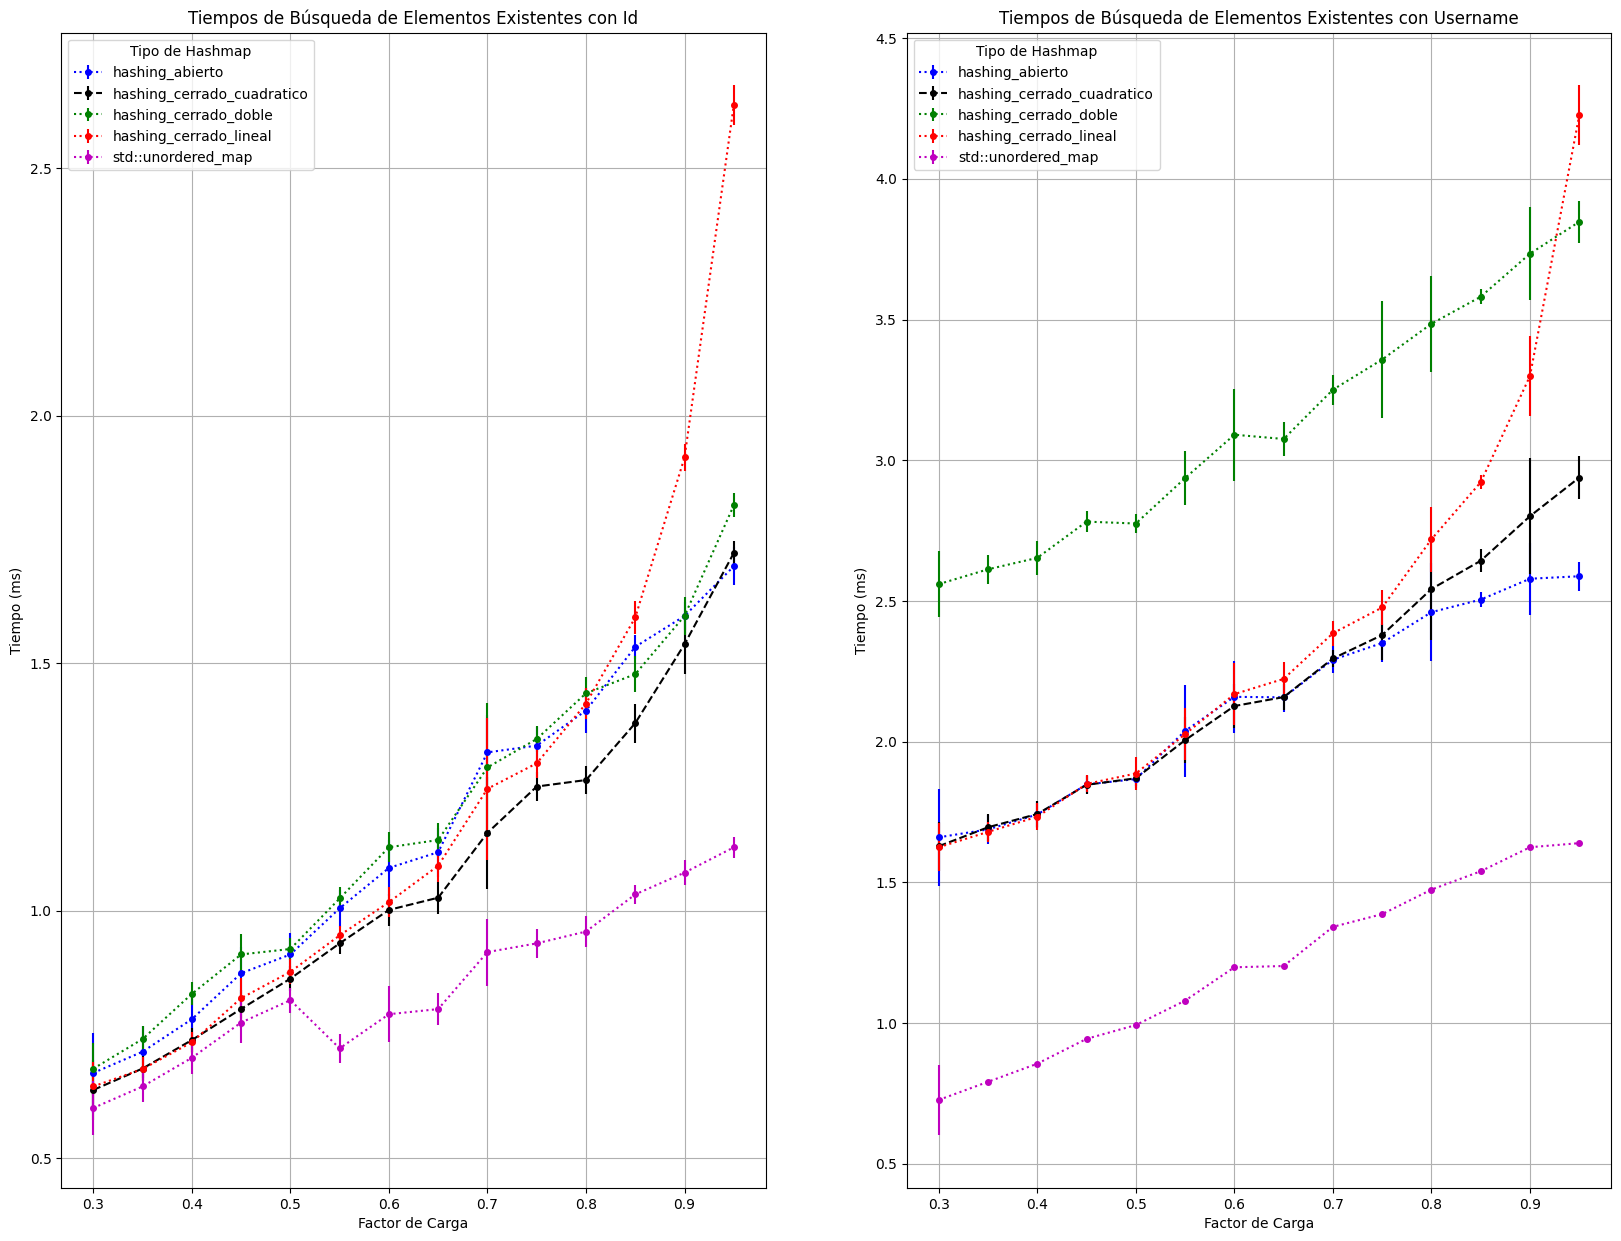

In [305]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["factor"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["factor"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i],yerr=grp["tiempo_err"])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Factor de Carga")

axes[0].set(title="Tiempos de Búsqueda de Elementos Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos Existentes con Username")

plt.savefig("busquedas_1.png", bbox_inches="tight")
plt.show()

# Busquedas Tipo 2

In [306]:
df_id = pd.read_csv("busquedas2_id.csv")
df_usr = pd.read_csv("busquedas2_username.csv")
df_dv_id = pd.read_csv("dv_busquedas2_id.csv")
df_dv_usr = pd.read_csv("dv_busquedas2_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa  0.300000  0.350000  0.400000  0.450000  \
0             hashing_abierto  0.402999  0.375983  0.395457  0.402722   
1      hashing_cerrado_lineal  0.365979  0.380284  0.415320  0.437832   
2  hashing_cerrado_cuadratico  0.379509  0.369471  0.404181  0.427163   
3       hashing_cerrado_doble  0.412589  0.424787  0.459523  0.479336   
4          std::unordered_map  0.547270  0.557422  0.607021  0.651028   

   0.500000  0.550000  0.600000  0.650000  0.700000  0.750000  0.800000  \
0  0.430430  0.453133  0.472057  0.494863  0.519984  0.545732  0.566801   
1  0.491120  0.532497  0.579159  0.653150  0.788633  0.933472  1.184935   
2  0.476215  0.505592  0.542003  0.598128  0.671623  0.752950  0.873466   
3  0.533079  0.564702  0.614021  0.665905  0.747199  0.831929  0.979696   
4  0.724104  0.553150  0.601528  0.646852  0.721154  0.766218  0.841898   

   0.850000  0.900000   0.950000  
0  0.619376  0.648112   0.686783  
1  1.826607  4.188036  13.605164  
2  1.

In [307]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="factor", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="factor", value_name="tiempo")
df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]



df_id_melted["factor"] = df_id_melted["factor"].astype(float)
df_usr_melted["factor"] = df_usr_melted["factor"].astype(float)

#df_id_melted = df_id_melted.drop(df_id_melted[df_id_melted["busquedas"] > 15000].index)
#df_usr_melted = df_usr_melted.drop(df_usr_melted[df_usr_melted["busquedas"] > 15000].index)

print(df_id_melted.head())
print(df_usr_melted.head())

                         mapa  factor    tiempo  tiempo_err
0             hashing_abierto     0.3  0.402999    0.107353
1      hashing_cerrado_lineal     0.3  0.365979    0.042913
2  hashing_cerrado_cuadratico     0.3  0.379509    0.070995
3       hashing_cerrado_doble     0.3  0.412589    0.050216
4          std::unordered_map     0.3  0.547270    0.096166
                         mapa  factor    tiempo  tiempo_err
0             hashing_abierto     0.3  1.269618    0.095113
1      hashing_cerrado_lineal     0.3  1.267865    0.046469
2  hashing_cerrado_cuadratico     0.3  1.264150    0.043590
3       hashing_cerrado_doble     0.3  2.103634    0.071847
4          std::unordered_map     0.3  0.556063    0.078685


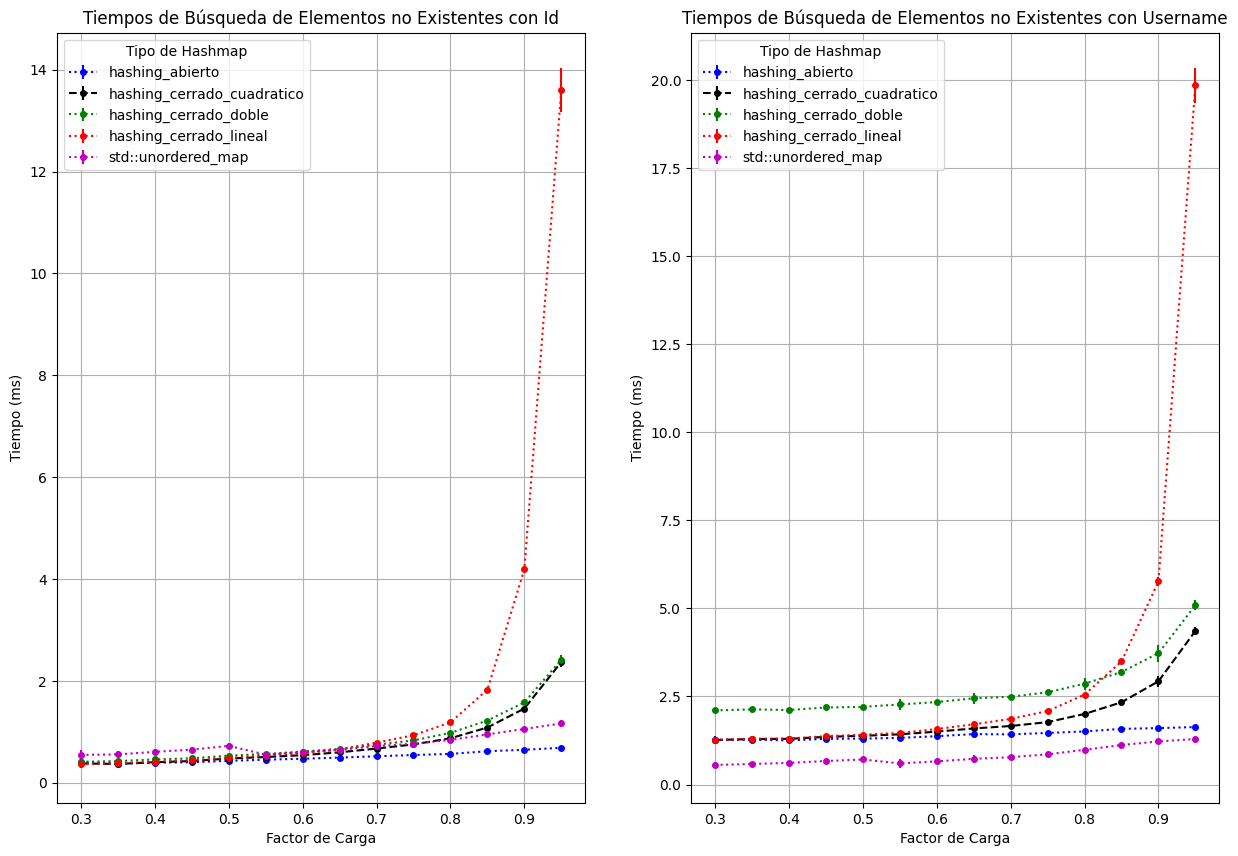

In [308]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))


styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["factor"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["factor"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1
    
for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Factor de Carga")

axes[0].set(title="Tiempos de Búsqueda de Elementos no Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos no Existentes con Username")

plt.savefig("busquedas_2.png", bbox_inches="tight")
plt.show()